## Άσκηση 3 - Μαγνητικά Υλικά και Εφαρμογές
### Σκόρδα Στεφανία
### ΑΜ: 03118852

## Ερώτημα 1
 Προσομοίωση βρόχου υστέρησης m(h) για διάφορες γωνίες του εφαρμοζόμενου πεδίου h. Θεωρούμε ότι το κανονικοποιημένο πεδίο h μεταβάλλεται μεταξύ +1.0 και -1.0 με βήμα 0.1.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import sympy as sym #symbolic library
from mpmath import *
from math import radians
import math
from termcolor import colored
import warnings
warnings.filterwarnings('ignore')

#### Από μοίρες σε radians

In [2]:
def radians(degree):
    return degree*np.pi/180

### Αρχικοποίηση του εφαρμοζόμενου πεδίου $H$, permeability $μ_0$ και οι γωνίες θ που θέλουμε να εφαρμόζουμε το πεδίο $h$ 

In [3]:
hx,hy,phi = sym.symbols("hx,hy,phi")
E, M, Ku,Hk = sym.symbols("E,M,Ku,Hk")

H_norm = np.arange(-1.1,1.2,0.1)
H = np.round_(H_norm, decimals = 1)

k = sym.tan(phi/2)

m0 = 4*np.pi*10e-7
Hk = 2*Ku/(m0*M)
theta = [radians(0),radians(10),radians(20),radians(30),radians(45),radians(60),radians(70),
         radians(80),radians(90)]
Hk

159154.943091895*Ku/M

### Συνάρτηση η οποία βρίσκει την γωνία $φ$ για διάφορα εφαρμοζόμενα πεδία
* Αρχικά υπάρχουν 2 ή 4 πραγματικές λύσεις. Για την πρώτη τιμή, γνωρίζοντας ότι εφαρμόζοντας το πεδίο από τις αρνητικές προς τις θετικές τιμές κρατάμε μία αρχικοποιημένη γωνία. Στη συνέχεια συγκρίνουμε την τιμή αυτή με την προηγούμενη και κρατάμε την πιο κοντινή υπό την συνθήκη $h_x^{2/3} + h_y^{2/3} > 1$ , τότε η μαγνήτιση αναστρέφει τον προσανατολισμό σύμφωνα με την παρακάτω εικόνα.
* Η λύση της γωνίας $φ$ βρίσκεται από την έκφραση $h_x tan(φ) - h_y + sin(φ) = 0$ η οποία αν αντικαταστήσουμε με $k=tan(φ/2)$ προκύπτει η έκφραση $h_yk^4 + 2(h_x -1)k^3 +2(h_x +1) - h_y = 0$, όπως περιγράφεται και στο paper "Identification of 1D and 2D Preisach models for ferromagnets and shape memory alloys". <br>
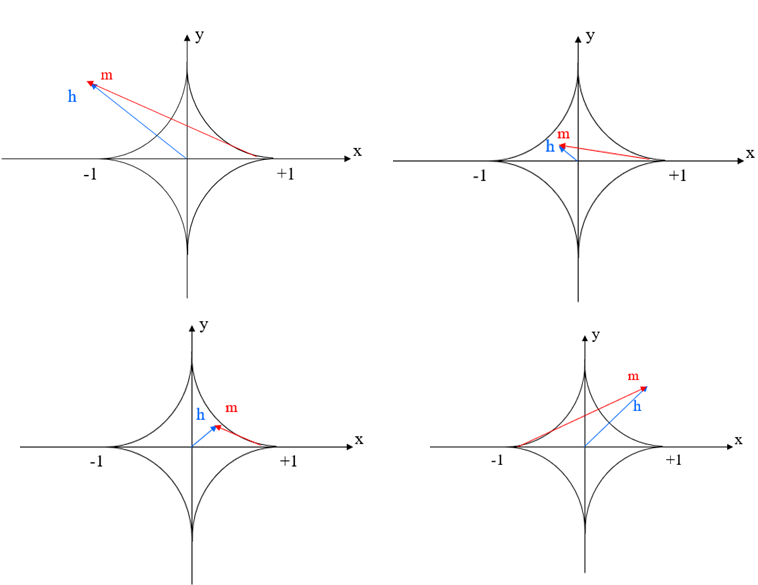

### Βήμα-βήμα πως λειτουργεί η συνάρτηση για $θ = 60°$.

In [4]:
theta60 = theta[5]

#### Λύσεις με $k=tan(φ/2)$ για την εξίσωση $h_yk^4 + 2(h_x -1)k^3 +2(h_x +1) - h_y = 0$

In [5]:
solution1 = []
for h in H:
    hx = h * np.cos(theta60)
    hy = h * np.sin(theta60)
    p = [hy, 2 * (hx - 1), 0, 2 * (hx + 1), -hy]
    solution1.append(np.roots(p))
solution1[0]

array([-3.1921848 +0.j        ,  0.75308161+0.j        ,
       -0.40752644+0.49989979j, -0.40752644-0.49989979j])

#### Κρατάμε τις πραγματικές ρίζες

In [6]:
solution2 = [sol[np.isreal(sol)] for sol in solution1]
solution2[0]

array([-3.1921848 +0.j,  0.75308161+0.j])

#### $phi = 2arctan(k) $

In [7]:
solution3 = [2 * np.arctan(np.real(sol)) for sol in solution2] #extracting theta = 2 * arctan(k)
solution3[0]

array([-2.53442921,  1.29094084])

In [8]:
((np.abs(H[0]) * np.cos(theta))**(2/3) + (np.abs(H[0]) * np.sin(theta))**(2/3))

array([1.06560224, 1.38645398, 1.54346741, 1.63945123, 1.69153811,
       1.63945123, 1.54346741, 1.38645398, 1.06560224])

#### Εκτύπωση Λύσεων εξίσωσης

In [9]:
# print("\n\n")
print("="*60)
print(colored(" Hysteresis Loop Solutions (Theta = 60°) ", "yellow", "on_grey", ["bold"]))
print("="*60)
# print("\n\n")

p = 0

for i in range(len(solution3)):
    print(" H = {}".format(H[i]))
    if (np.abs(H[i]) * np.cos(theta60))**(2/3) + (np.abs(H[i]) * np.sin(theta60))**(2/3) >= 1 and p == 0 and H[i] > 0:
        print("\n\n")
        print(colored("    hx^2/3 + hy^2/3 = {}".format((np.abs(H[i]) * np.cos(theta60))**(2/3) + (np.abs(H[i]) * np.sin(theta60))**(2/3)), "red"))
        print("\n")
        print("    {}".format(solution3[i]))
        print("\n")
        p = p + 1
    else:
        print("    hx^2/3 + hy^2/3 = {}".format((np.abs(H[i]) * np.cos(theta60))**(2/3) + (np.abs(H[i]) * np.sin(theta60))**(2/3)))
        # print("\n")
        print("    {}".format(solution3[i]))
        # print("\n")


 Hysteresis Loop Solutions (Theta = 60°) 
 H = -1.1
    hx^2/3 + hy^2/3 = 1.6394512285569558
    [-2.53442921  1.29094084]
 H = -1.0
    hx^2/3 + hy^2/3 = 1.5385208213635067
    [-2.56777548  1.30417818]
 H = -0.9
    hx^2/3 + hy^2/3 = 1.4341625721682552
    [-2.60462618  1.31880853]
 H = -0.8
    hx^2/3 + hy^2/3 = 1.3258570515527541
    [-2.64526262  1.33504598]
 H = -0.7
    hx^2/3 + hy^2/3 = 1.2129290698553035
    [-2.68995391  1.35314798]
 H = -0.6
    hx^2/3 + hy^2/3 = 1.0944708816652817
    [-2.7389573   1.37342653]
 H = -0.5
    hx^2/3 + hy^2/3 = 0.9692073842687159
    [-2.7925268   1.3962634  -1.04719755 -0.6981317 ]
 H = -0.4
    hx^2/3 + hy^2/3 = 0.8352376042014336
    [-2.85093332  1.42213121 -1.25038884 -0.46240171]
 H = -0.3
    hx^2/3 + hy^2/3 = 0.6894734511535445
    [-2.91449997  1.45162379 -1.36515748 -0.313559  ]
 H = -0.2
    hx^2/3 + hy^2/3 = 0.5261667195985744
    [-2.98365793  1.48550224 -1.44936084 -0.19407613]
 H = -0.1
    hx^2/3 + hy^2/3 = 0.33146426288818853


#### Κρατάμε τις επιθυμητές λύσεις

In [10]:
arr = np.array(solution3)
sign = -1
phi = []
for i, sol in enumerate(solution3):
    if i <= 18 and (np.abs(H[i] * np.cos(theta60))**(2/3) + np.abs(H[i] * np.sin(theta60))**(2/3)) >= 1 and (H[i] * np.cos(theta60)) >= 0:
        sign = 1
    
    if H[i] == 0:
        newlist = [np.pi]
    else:
        newlist = [x for x in arr[i] if np.sign(np.cos(x)) == sign]
        newlist = np.array(newlist, dtype=np.float32)
        newlist = [newlist[np.argmax(np.abs(np.cos(newlist)))]]
    phi.append(newlist)
    phi

In [11]:
# print("\n\n")
print("="*60)
print(colored(" Hysteresis Loop Solutions (Theta = 60°) ", "yellow", "on_grey", ["bold"]))
print("="*60)
# print("\n\n")

for i in range(len(phi)):
    print("H = {}".format(H[i]))
    print("hx^2/3 + hy^2/3 = {}".format((np.abs(H[i]) * np.cos(theta60))**(2/3) + (np.abs(H[i]) * np.sin(theta60))**(2/3)))
    print(np.degrees(phi[i][0]))
    print()
    #print('\n')

 Hysteresis Loop Solutions (Theta = 60°) 
H = -1.1
hx^2/3 + hy^2/3 = 1.6394512285569558
-145.2121

H = -1.0
hx^2/3 + hy^2/3 = 1.5385208213635067
-147.1227

H = -0.9
hx^2/3 + hy^2/3 = 1.4341625721682552
-149.23409

H = -0.8
hx^2/3 + hy^2/3 = 1.3258570515527541
-151.56238

H = -0.7
hx^2/3 + hy^2/3 = 1.2129290698553035
-154.12299

H = -0.6
hx^2/3 + hy^2/3 = 1.0944708816652817
-156.9307

H = -0.5
hx^2/3 + hy^2/3 = 0.9692073842687159
-159.99998

H = -0.4
hx^2/3 + hy^2/3 = 0.8352376042014336
-163.34644

H = -0.3
hx^2/3 + hy^2/3 = 0.6894734511535445
-166.98854

H = -0.2
hx^2/3 + hy^2/3 = 0.5261667195985744
-170.95099

H = -0.1
hx^2/3 + hy^2/3 = 0.33146426288818853
-175.26971

H = 0.0
hx^2/3 + hy^2/3 = 0.0
180.0

H = 0.1
hx^2/3 + hy^2/3 = 0.33146426288818853
174.76845

H = 0.2
hx^2/3 + hy^2/3 = 0.5261667195985744
168.88025

H = 0.3
hx^2/3 + hy^2/3 = 0.6894734511535445
162.03438

H = 0.4
hx^2/3 + hy^2/3 = 0.8352376042014336
153.50632

H = 0.5
hx^2/3 + hy^2/3 = 0.9692073842687159
139.99998

H = 

In [12]:
cosines = [np.cos(f[0] - theta60) for f in phi]
reversed_cosines = [-cos for cos in cosines[::-1]]

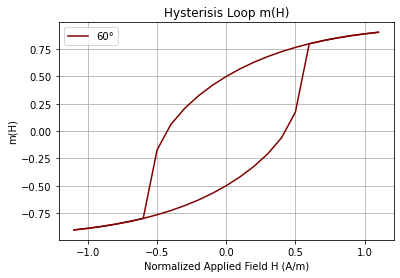

In [13]:
plt.plot(H, cosines, color = "maroon")
plt.plot(H, reversed_cosines, color = "maroon")
plt.grid()
plt.xlabel("Normalized Applied Field H (A/m)");
plt.title('Hysterisis Loop m(H)');
plt.ylabel('m(H)')
plt.legend(['60°'])

### Συνάρτηση

In [14]:
def solutions(theta):
    solution1 = []
    for h in H:
        hx = h * np.cos(theta)
        hy = h * np.sin(theta)
        p = [hy, 2 * (hx - 1), 0, 2 * (hx + 1), -hy]
        solution1.append(np.roots(p))

    solution2 = [sol[np.isreal(sol)] for sol in solution1]
    solution3 = [2 * np.arctan(np.real(sol)) for sol in solution2]
    arr = np.array(solution3)
    sign = -1

    phi = []
    for i, sol in enumerate(solution3):
        if i <= 18 and (np.abs(H[i] * np.cos(theta))**(2/3) + np.abs(H[i] * np.sin(theta))**(2/3)) >= 1 and (H[i] * np.cos(theta)) >= 0:
            sign = 1
        
        if H[i] == 0:
            newlist = [np.pi]
        else:
            newlist = [x for x in arr[i] if np.sign(np.cos(x)) == sign]
            newlist = np.array(newlist, dtype=np.float32)
            newlist = [newlist[np.argmax(np.abs(np.cos(newlist)))]]
        phi.append(newlist)
    
    cosines = [np.cos(f[0] - theta) for f in phi]
    reversed_cosines = [-cos for cos in cosines[::-1]]

    return (phi, cosines, reversed_cosines)


##### Για τις εφαρμοζόμενο πεδίο υπό τις γωνίες 0° και 90° θα χειριστούμε αλλιώς την επίλυση καθώς προέρχονται κατευθείαν από την αρχική εξίσωση $h_xcos(φ) + h_ysin(φ) + cos(φ)sin(φ)=0$.

In [15]:
#solution for angle 0
H_norm0 = np.arange(-1.1,1.2,0.01)
H0 = np.round_(H_norm0, decimals = 1)

phi0 = []
cosines0 = []
reversed_cos0 = []

for h in H0:
    if h > 1 and h > 0:
        phi0.append(0)
        cosines0.append(1)
    else:
        phi0.append(np.pi)
        cosines0.append(-1)
reversed_cos0 = [-cos for cos in cosines0[::-1]]

In [16]:
#solution for angle 90

sines90 = []

for h in H:
       if h <= -1:
           sines90.append(-1)
       elif h >= 1:
           sines90.append(1)
       else:
           sines90.append(h)
   
sin90 = np.array(sines90)
phi90 = np.arcsin(sin90)
phi90

array([-1.57079633, -1.57079633, -1.11976951, -0.92729522, -0.7753975 ,
       -0.64350111, -0.52359878, -0.41151685, -0.30469265, -0.20135792,
       -0.10016742,  0.        ,  0.10016742,  0.20135792,  0.30469265,
        0.41151685,  0.52359878,  0.64350111,  0.7753975 ,  0.92729522,
        1.11976951,  1.57079633,  1.57079633])

#### Γραφική όλων των βρόχων υστέρησης σε ένα plot

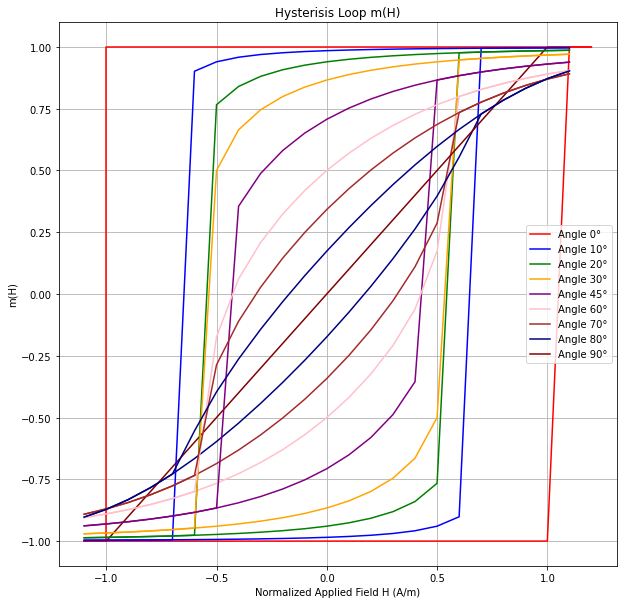

In [17]:
color = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'brown','navy','maroon']

plt.plot(H0, cosines0, color[0])

for i in range(7):
    phi, cosines, reversed_cos = solutions(theta[i+1])
    hx = H * np.cos(theta[i+1])
    plt.plot(H,cosines, color[i+1])
    
plt.plot(H, sines90, color[8])
plt.legend(['Angle 0°', 'Angle 10°', 'Angle 20°', 'Angle 30°', 'Angle 45°', 'Angle 60°', 'Angle 70°', 'Angle 80°', 'Angle 90°'])

plt.plot(H0, reversed_cos0, color[0])

for i in range(7):
    phi, cosines, reversed_cos = solutions(theta[i+1])
    hx = H * np.cos(theta[i+1])
    plt.plot(H,reversed_cos, color[i+1])

plt.grid()
plt.xlabel("Normalized Applied Field H (A/m)");
plt.title('Hysterisis Loop m(H)');
plt.ylabel('m(H)')
plt.gcf().set_size_inches(10,10)

## Ερώτημα 2
* Στην περίπτωση της προσομοίωσης του βρόχου, υπολογίστε την ενέργεια E, όπως δίνεται στην εξ. $E = -μ_0MHcos(θ-φ) + K_u sin(φ)$, για κάθε τιμή εφαρμοζόμενου πεδίου Η, και γωνίες θ=0° , 45° και 90° , για καθένα από τα δύο υλικά. Σχεδιάστε την γραφική παράσταση Ε(Η) για κάθε περίπτωση.


In [21]:
m0 = 4 * np.pi * (10 ** (-7))
Ms = 1700 * (10 ** 3)
K = 48 * (10 ** 3)
Hk = 2 * K / (m0 * Ms)
Hnonnorm = H_norm*2*K
Hnonorm0 = H_norm0*2*K
phi0 = np.array(phi0)
phi45, _, _ = solutions(theta[4])
phi45 = np.array(phi45)

In [22]:
def energy (K, M, final, H, theta):
    E = []
    m0 = 4 * np.pi * (10 ** (-7))
    for i in range(len(final)):
        E.append(- m0 * Ms * 2 * K * H[i] * np.cos(theta - final[i]) + K * (np.sin(final[i]))**2)
    return np.array(E)

In [23]:
def energyplot(H,E,materialtitle,color,angle):
    plt.plot(H,E,color = color)
    plt.grid()
    plt.legend([angle])
    plt.xlabel("Normalized Applied Field H (A/m)")
    plt.title('Energy vs. Applied Field of {}'.format(materialtitle))
    plt.ylabel('Energy (kJ)')
    plt.gcf().set_size_inches(5,5)

### Material 1 (Fe) - SMM: <br>
* $K=48kJ/m^3$, <br>
* $A_{ex}=21pJ/m$, <br>
* $M_{s}=1700kA/m$

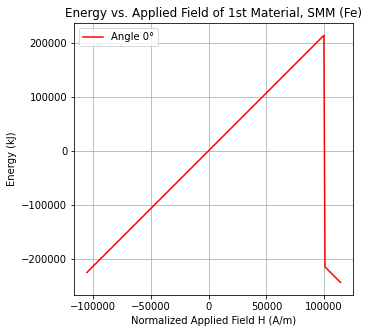

In [25]:
E0 = energy(K, Ms, phi0, H_norm0, theta[0])
energyplot(Hnonorm0,E0,'1st Material, SMM (Fe)','red','Angle 0°')

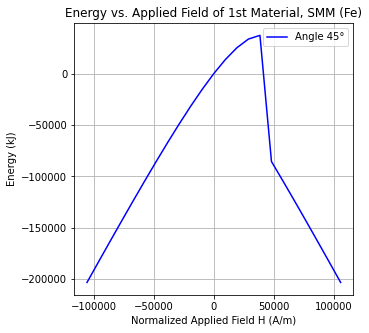

In [26]:
E45 = energy(K, Ms, phi45, H_norm, theta[4])
energyplot(Hnonnorm,E45,'1st Material, SMM (Fe)','blue','Angle 45°')

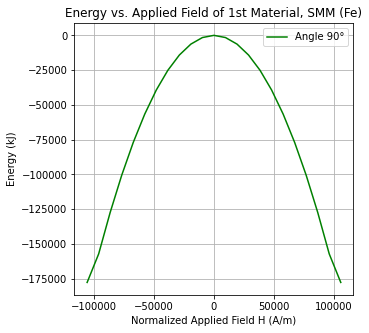

In [27]:
E90 = energy(K, Ms, phi90, H_norm, theta[8])
energyplot(Hnonnorm,E90,'1st Material, SMM (Fe)','green','Angle 90°')

Text(0, 0.5, 'Energy (J)')

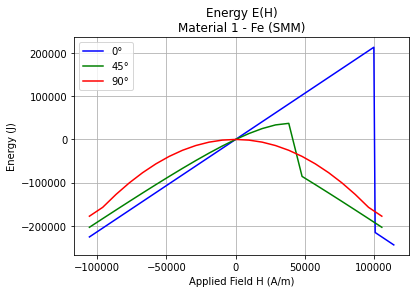

In [28]:
plt.plot(Hnonorm0,E0, color[1])
plt.plot(Hnonnorm,E45, color[2])
plt.plot(Hnonnorm,E90, color[0])
plt.grid()
plt.legend(['0°', '45°', '90°'])
plt.xlabel("Applied Field H (A/m)");
plt.title('Energy E(H)\nMaterial 1 - Fe (SMM)');
plt.ylabel('Energy (J)')

### Material 2 (Σπάνια Γαία) - HMM:<br>
* $K=4500kJ/m^3$,<br>
* $A_{ex}=13pJ/m$,<br> 
* $M_{s}=1280kA/m$

In [29]:
m0 = 4 * np.pi * (10 ** (-7))
Ms = 1280 * (10 ** 3)
K = 4500 * (10 ** 3)

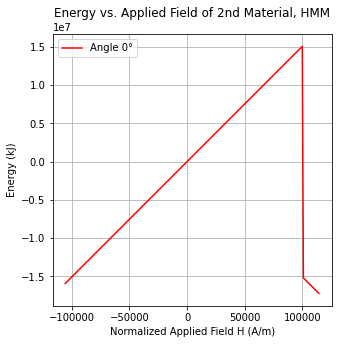

In [31]:
E0 = energy(K, Ms, phi0, H_norm0, theta[0])
energyplot(Hnonorm0,E0,'2nd Material, HMM','red','Angle 0°')

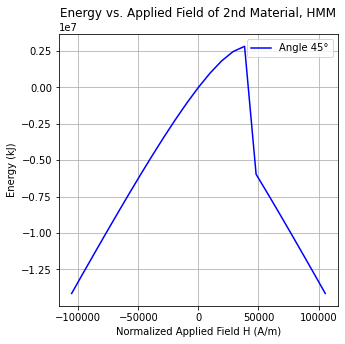

In [32]:
E45 = energy(K, Ms, phi45, H_norm, theta[4])
energyplot(Hnonnorm,E45,'2nd Material, HMM','blue','Angle 45°')

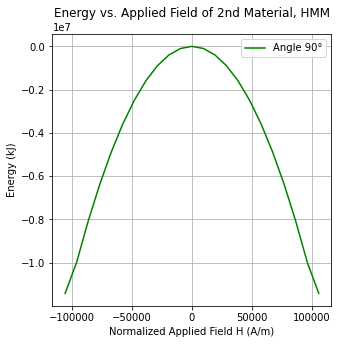

In [33]:
E90 = energy(K, Ms, phi90, H_norm, theta[8])
energyplot(Hnonnorm,E90,'2nd Material, HMM','green','Angle 90°')

Text(0, 0.5, 'Energy (J)')

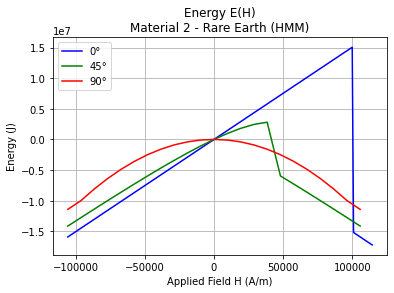

In [34]:
plt.plot(Hnonorm0,E0, color[1])
plt.plot(Hnonnorm,E45, color[2])
plt.plot(Hnonnorm,E90, color[0])
plt.grid()
plt.legend(['0°', '45°', '90°'])
plt.xlabel("Applied Field H (A/m)");
plt.title('Energy E(H)\nMaterial 2 - Rare Earth (HMM)');
plt.ylabel('Energy (J)')